In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
import seaborn as sns
sns.set_theme()
%matplotlib inline
from matplotlib import pyplot as plt

In [38]:
df =  pd.read_csv("joined_data_refined.csv",keep_default_na=False, na_values=[""])
print(df.columns)

Index(['Store', 'Dept', 'Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'IsHoliday', 'Type_A', 'Type_B', 'Type_C',
       'month', 'Year', 'quarter', 'is_weekend'],
      dtype='object')


In [39]:
X = df.loc[:, df.columns != 'Weekly_Sales']
y = df.loc[:, df.columns == 'Weekly_Sales']

X = X[["Store", "Dept", "Size", "IsHoliday", "CPI", "Temperature","Type_B","Type_C","MarkDown4","month","Year" ]]
y = y.values.reshape(-1, 1)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Store  Dept    Size  IsHoliday         CPI  Temperature  Type_B  Type_C  \
0      1     1  151315          0  211.096358        42.31       0       0   
1      1     1  151315          1  211.242170        38.51       0       0   
2      1     1  151315          0  211.289143        39.93       0       0   
3      1     1  151315          0  211.319643        46.63       0       0   
4      1     1  151315          0  211.350143        46.50       0       0   

   MarkDown4  month  Year  
0        0.0      2  2010  
1        0.0      2  2010  
2        0.0      2  2010  
3        0.0      2  2010  
4        0.0      3  2010  


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=4, n_neighbors=10, p=2, weights='distance')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

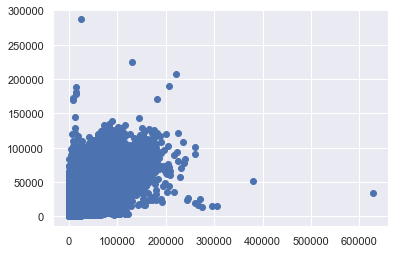

In [41]:
plt.scatter(y_test,y_pred_knn)
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
print('Accuracy:',knn.score(X_test, y_test)*100,'%')

rms = mean_squared_error(y_test, y_pred_knn, squared=False)
print('RMSE:',rms)

print('MAE:',mean_absolute_error(y_test, y_pred_knn))


Accuracy: 44.5473406175588 %
RMSE: 16830.19007804976
MAE: 9998.515037041372
